http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [58]:
import requests
import matplotlib.pyplot as plt

# Send a GET request to the API endpoint
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")


Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

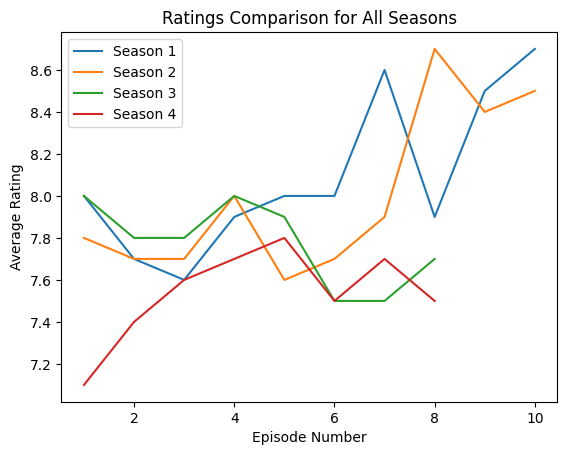

In [59]:
if response.status_code == 200:
    # access the json data
    data = response.json()

    #episode information
    episodes = data['_embedded']['episodes']
    season_ratings = {}
    #seasons should be set() , because it should contain repeated values
    seasons = set()
    
    for episode in episodes:
        episode_season = episode['season']
        episode_average_rating = episode['rating']['average']

        seasons.add(episode_season)

        if episode_season not in season_ratings:
            season_ratings[episode_season] = []

        season_ratings[episode_season].append(episode_average_rating)

    # Sort the seasons in ascending order
    seasons = sorted(seasons)

    # Plot the ratings for each season
    for season in seasons:
        ratings = season_ratings[season]

        plt.plot(range(1, len(ratings) + 1), ratings, label=f"Season {season}")

    plt.title("Ratings Comparison for All Seasons")
    plt.xlabel("Episode Number")
    plt.ylabel("Average Rating")
    plt.legend()
    plt.show()
else:
    # Print an error message if the request was not successful
    print("Error:", response.status_code)

● Get all the episode names, whose average rating is more than 8 for every season

In [60]:
import requests
import pandas as pd
#getting the data from API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

#check if the GET method was succesfull
if response.status_code == 200:
    # Get the json data
    data = response.json()

    #take off the episodes information
    episodes = data['_embedded']['episodes']

    # Group episodes by season
    episodes_by_season = {}
    for episode in episodes:
        season = episode['season']
        if season not in episodes_by_season:
            episodes_by_season[season] = []
        episodes_by_season[season].append(episode)

    # Filter episodes with average ratings > 8 for each season
    filtered_episodes = {}
    for season, episodes in episodes_by_season.items():
        filtered_episodes[season] = []
        for episode in episodes:
            rating = episode['rating']['average']
            if rating is not None and rating > 8:
                filtered_episodes[season].append(episode)

    # Print the episode names and ratings for each season
    # Create a DataFrame from the filtered episodes
    data = []
    for season, episodes in filtered_episodes.items():
        for episode in episodes:
            name = episode['name']
            rating = episode['rating']['average']
            data.append({'Season': season, 'Episode': name, 'Rating': rating})

    df = pd.DataFrame(data)

else:
    # Print an error message if the request was not successful
    print("Error:", response.status_code)


In [61]:
df

,Season,Episode,Rating
0,1,Trompe L'Oeil,8.6
1,1,The Well-Tempered Clavier,8.5
2,1,The Bicameral Mind,8.7
3,2,Kiksuya,8.7
4,2,Vanishing Point,8.4
5,2,The Passenger,8.5


● Get all the episode names that aired before May 2019


In [62]:
from datetime import datetime

# Define the target date as May 2019
target_date = datetime(2019, 5, 1)

# List to store episode names
episode_names = []


In [63]:
for season, episodes in filtered_episodes.items():
    for episode in episodes:
        airdate = episode['airdate']
        if airdate is not None:
            # Convert airdate to a datetime object
            airdate = datetime.strptime(airdate, "%Y-%m-%d")
            if airdate < target_date:
                episode_names.append(episode['name'])

In [64]:
print("Episodes aired before May 2019:")
for i, name in enumerate(episode_names, start=1):
    print(f"{i}. {name}")


Episodes aired before May 2019:
1. Trompe L'Oeil
2. The Well-Tempered Clavier
3. The Bicameral Mind
4. Kiksuya
5. Vanishing Point
6. The Passenger


● Get the episode name from each season with the highest and lowest rating


In [65]:
import requests
import pandas as pd
#getting the data from API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = response.json()

seasons = {}

# Iterate over the episodes and find the highest and lowest rating for each season
for episode in data['_embedded']['episodes']:
    season = episode['season']
    rating = episode['rating']['average']
    name = episode['name']

    if season not in seasons:
        seasons[season] = {'highest_rating': rating, 'lowest_rating': rating, 'highest_name': name, 'lowest_name': name}
    else:
        if rating > seasons[season]['highest_rating']:
            seasons[season]['highest_rating'] = rating
            seasons[season]['highest_name'] = name
        if rating < seasons[season]['lowest_rating']:
            seasons[season]['lowest_rating'] = rating
            seasons[season]['lowest_name'] = name




In [66]:
#Print the episode name with the highest and lowest rating for each season
for season, ratings in seasons.items():
    print(f"Season {season}:\n")
    print(f"Highest Rated Episode: {ratings['highest_name']} (Rating: {ratings['highest_rating']})")
    print(f"Lowest Rated Episode: {ratings['lowest_name']} (Rating: {ratings['lowest_rating']})\n")
    print("====================================================================================")

Season 1:

Highest Rated Episode: The Bicameral Mind (Rating: 8.7)
Lowest Rated Episode: The Stray (Rating: 7.6)

Season 2:

Highest Rated Episode: Kiksuya (Rating: 8.7)
Lowest Rated Episode: Akane No Mai (Rating: 7.6)

Season 3:

Highest Rated Episode: Parce Domine (Rating: 8)
Lowest Rated Episode: Decoherence (Rating: 7.5)

Season 4:

Highest Rated Episode: Zhuangzi (Rating: 7.8)
Lowest Rated Episode: The Auguries (Rating: 7.1)



● Get the summary for the most popular ( ratings ) episode in every season


In [72]:
import requests
import pandas as pd
#getting the data from API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = response.json()
from bs4 import BeautifulSoup
#beautiful soup is to parse content so that we can avoid html tags from the summary text

# Create a dictionary to store the most popular episode for each season
most_popular_episodes = {}

# Iterate over the episodes and track the most popular episode for each season
for episode in data['_embedded']['episodes']:
    season_num = episode['season']
    rating = episode['rating']['average']
    summary = episode['summary']

    # Parse the summary HTML and extract the text content
    soup = BeautifulSoup(summary, 'html.parser')
    summary_text = soup.get_text()

    # Check if the season number is already present in the dictionary
    if season_num in most_popular_episodes:
        # Check if the current episode has a higher rating than the previous most popular episode
        if rating > most_popular_episodes[season_num]['rating']:
            most_popular_episodes[season_num] = {'name': episode['name'], 'rating': rating, 'summary': summary_text}
    else:
        most_popular_episodes[season_num] = {'name': episode['name'], 'rating': rating, 'summary': summary_text}

# Print the summary for the most popular episode in each season
for season, episode in most_popular_episodes.items():
    print(f"Season {season}:")
    print(f"Most Popular Episode: {episode['name']}")
    print(f"Summary: {episode['summary']}")
    print()

Season 1:
Most Popular Episode: The Bicameral Mind
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2:
Most Popular Episode: Kiksuya
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3:
Most Popular Episode: Parce Domine
Summary: If you're stuck in a loop, try walking in a straight line.

Season 4:
Most Popular Episode: Zhuangzi
Summary: God is bored.



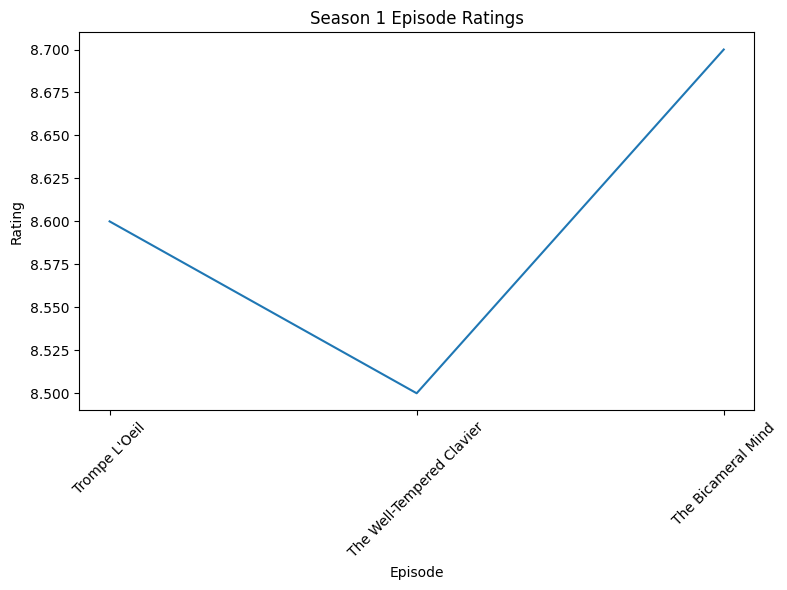

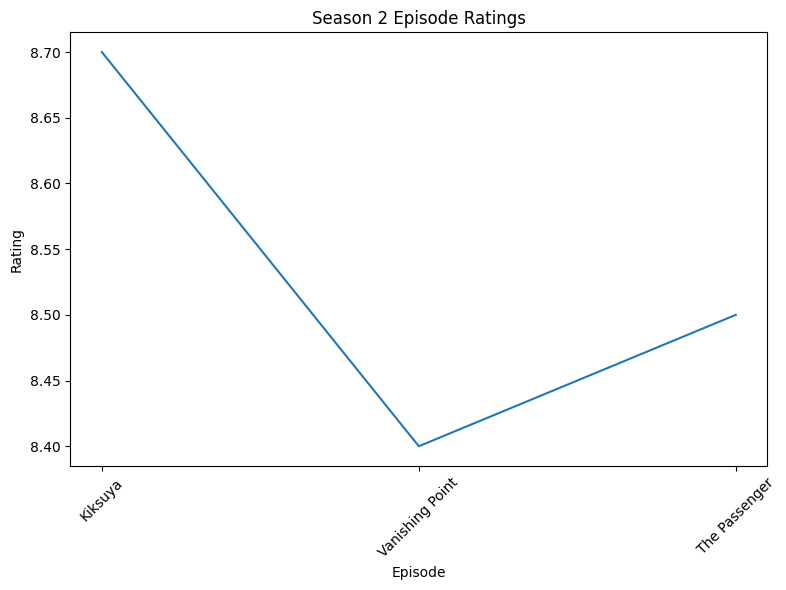

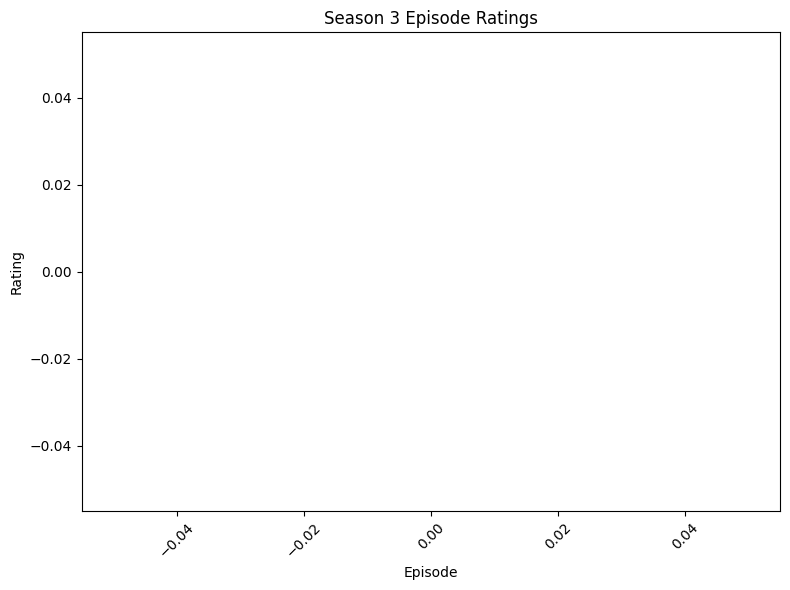

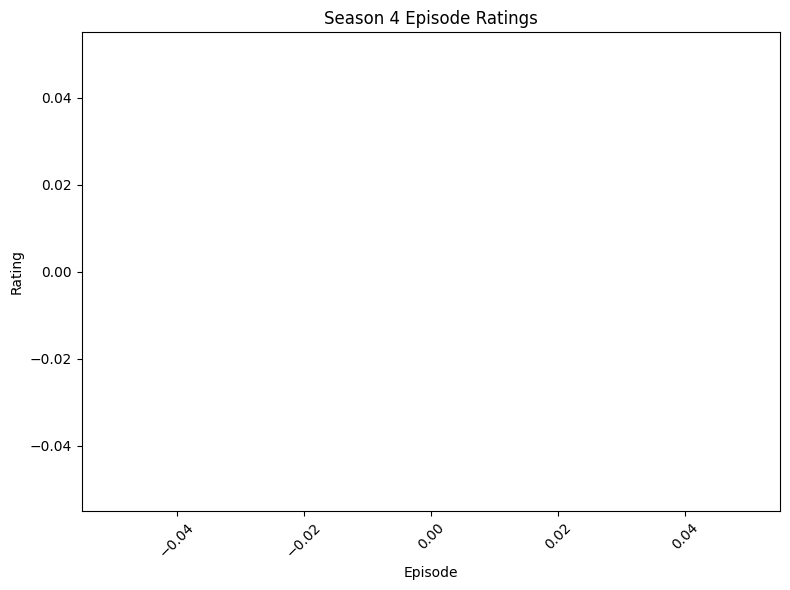

In [78]:

for season, episodes in filtered_episodes.items():
    episode_names = []
    ratings = []

    #find the episode names and ratings
    for episode in episodes:
        episode_names.append(episode['name'])
        ratings.append(episode['rating']['average'])

    # Create a line plot for each season
    plt.figure(figsize=(8, 6))
    plt.plot(episode_names, ratings)
    plt.title(f"Season {season} Episode Ratings")
    plt.xlabel('Episode')
    plt.ylabel('Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
